In [39]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statistics
import scipy.special as sp
plt.style.use("ggplot")

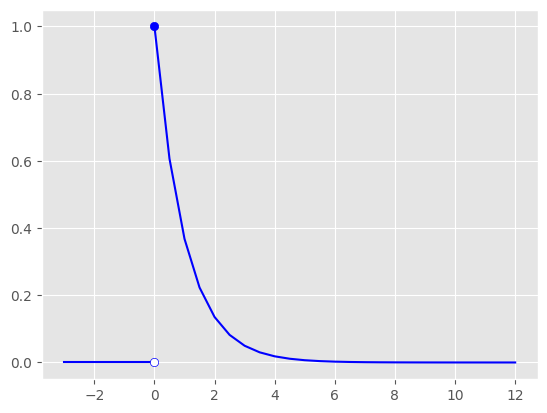

In [15]:
exp_rv = scipy.stats.expon(loc = 0,scale = 1)
x_l = np.linspace(-3, 0, 25)
p_x_l = np.zeros_like(x_l)
x_r = np.linspace(0, 12, 25)
p_x_r = exp_rv.pdf(x_r)
plt.plot(x_l, p_x_l, color = 'blue' )
plt.plot(x_r, p_x_r, color = 'blue')
plt.scatter([0], [0], color = 'white', edgecolors = 'blue', zorder = 3) 
plt.scatter([0], [1],color = 'blue' , zorder = 3 )

In [36]:
data = exp_rv.rvs(25)
data


array([1.18529496, 0.05072608, 0.37436388, 1.05104948, 1.03706148,
       1.13253469, 0.58099934, 2.24190163, 1.5158927 , 0.02309656,
       0.56899337, 1.02499186, 0.56498515, 1.61708394, 0.53708875,
       1.22182452, 0.34913763, 0.56344792, 1.2555232 , 1.29568065,
       0.07839145, 0.07372502, 0.14124237, 1.3136654 , 0.61702536])

a)

In [38]:
sort_arr = np.sort(data)
print(sort_arr)
l = sort_arr.max() - sort_arr.min() #размах выборки
print(l)
med = scipy.ndimage.median(sort_arr) # медиана(13 элемент)
print(med) 
moda = statistics.multimode(sort_arr) #мода
print([x.item() for x in moda])
as_coef = (scipy.stats.moment(sort_arr, moment = 3))/(scipy.stats.moment(sort_arr, moment = 2)**1.5) #коэффициент ассиметрии
print(as_coef)


[0.02309656 0.05072608 0.07372502 0.07839145 0.14124237 0.34913763
 0.37436388 0.53708875 0.56344792 0.56498515 0.56899337 0.58099934
 0.61702536 1.02499186 1.03706148 1.05104948 1.13253469 1.18529496
 1.22182452 1.2555232  1.29568065 1.3136654  1.5158927  1.61708394
 2.24190163]
2.2188050735892064
0.6170253586927928
[0.023096556890388774, 0.050726080477746655, 0.07372501683464, 0.07839145220081055, 0.1412423706520939, 0.34913763360571026, 0.3743638794972676, 0.5370887549119664, 0.5634479171877801, 0.5649851469992762, 0.5689933717760675, 0.5809993405266278, 0.6170253586927928, 1.0249918573234607, 1.0370614772562885, 1.05104948142393, 1.132534687043585, 1.1852949605821923, 1.2218245225320448, 1.2555232030996895, 1.2956806457181154, 1.313665399775643, 1.5158927024687563, 1.6170839371618544, 2.241901630479595]
0.4259607230896748


b)

0.17742273302297928
0.4587613725257065
1.2110584405185842
1.033635707495605
2.761512001761992
-1.3730308282204282
[3.09493893 3.80092941]


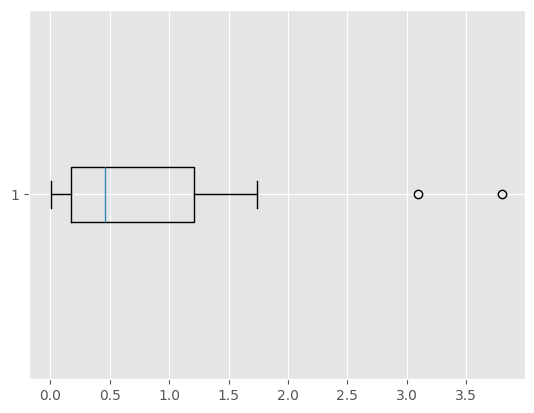

In [19]:
# Boxplot
q1 = np.quantile(sort_arr, 0.25)
q3 = np.quantile(sort_arr, 0.75)
IQR = q3 - q1
up_outlier = q3 + 1.5 * IQR
low_outlier = q1 - 1.5 * IQR
outliers = sort_arr[(sort_arr < low_outlier) | (sort_arr > up_outlier)]


print(q1,
      med,
      q3,
      IQR,
      up_outlier,
      low_outlier,
      outliers, sep = "\n")

plt.boxplot(sort_arr, vert = False)
plt.show()

(array([0.84371194, 0.31639198, 0.052732  , 0.        , 0.10546399]),
 array([0.00816573, 0.76671846, 1.5252712 , 2.28382394, 3.04237667,
        3.80092941]),
 <BarContainer object of 5 artists>)

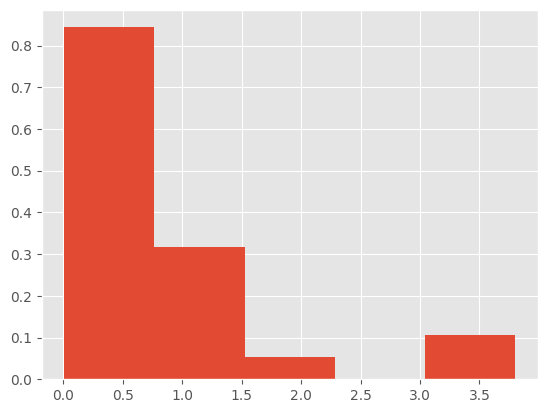

In [20]:
#Гистограмма
k = int((1 + (np.log2(25))))
delta = round(l/k)
delta



plt.hist(sort_arr, bins = k, density = True)

([<matplotlib.axis.XTick at 0x1745f33e210>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5')])

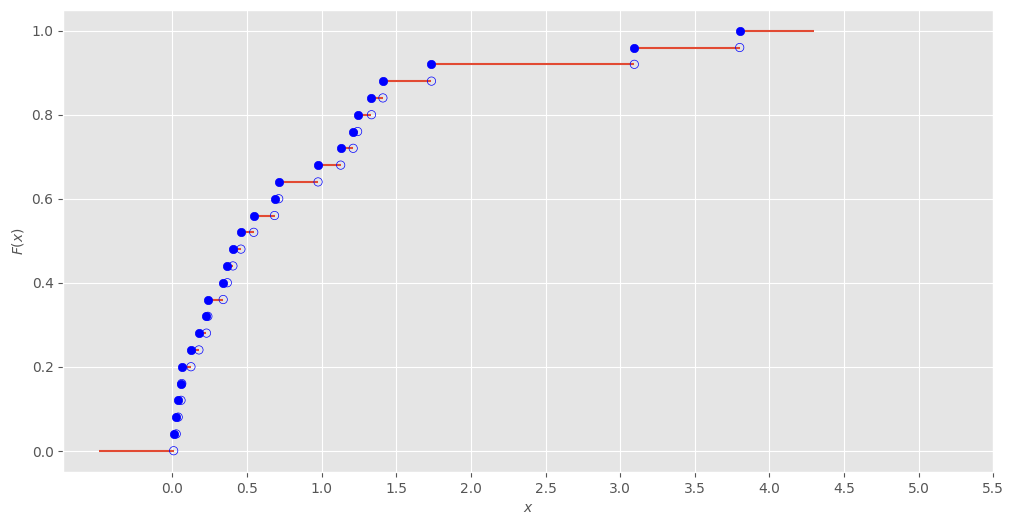

In [21]:
#эмпирическая функция распределения
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sort_arr)
x = np.unique(sort_arr)
y = np.nan
x_min = ecdf.x[1]
x_max = ecdf.x[-1]
plt.figure(figsize= (12,6))


plt.hlines(y=ecdf.y[:-1], xmin = ecdf.x[:-1], xmax = ecdf.x[1:])
plt.hlines(y=1, xmin=x_max, xmax = x_max + 0.5 )
plt.hlines(y=0, xmin=x_min -0.5, xmax=x_min)
plt.scatter(ecdf.x[1:], ecdf.y[:-1], facecolors = 'none', edgecolors = 'b', zorder = 2)
plt.scatter(ecdf.x, ecdf.y, color = 'blue', edgecolors = 'blue', zorder = 2)
plt.ylabel('$F(x)$', fontsize = 10)

#plt.xlim(x_min - 1, x_max + 1)
plt.xlabel('$x$', fontsize = 10)
plt.xticks(np.arange(0, 6, 0.5))


c)

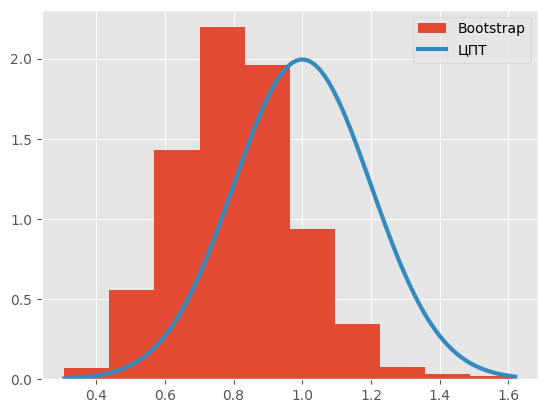

In [33]:
# bootstrap
N_boot = 1000
boot_mean = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_mean.append(np.mean(sub))

#ЦПТ
mu = 1
d = 1/25 #(почему такие параметры объяснил в cpt.pdf)

n_dist = scipy.stats.norm(mu,np.sqrt(d))
plt.hist(boot_mean, bins = int(np.log2(N_boot) + 1), density=True, label = 'Bootstrap')
x = np.linspace(min(boot_mean), max(boot_mean), 100)
y = n_dist.pdf(x)
plt.plot(x, y, lw = 3, label = 'ЦПТ')
plt.legend()


d)

0.132


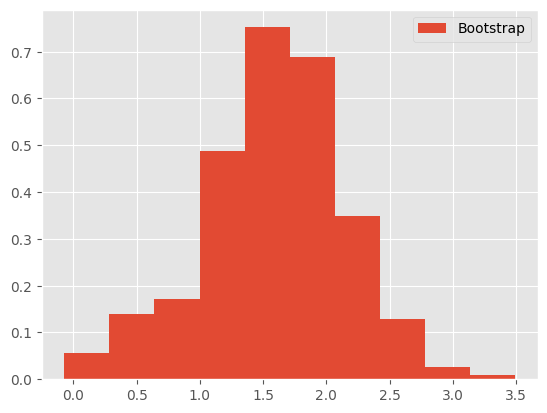

In [35]:
N_boot = 1000
boot_ = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_.append((scipy.stats.moment(sub, moment = 3))/(scipy.stats.moment(sub, moment = 2)**1.5))
plt.hist(boot_, bins = int(np.log2(N_boot) + 1), density=True, label = 'Bootstrap')
plt.legend()


prob = np.mean(np.array(boot_)< 1)
print(prob)

e)

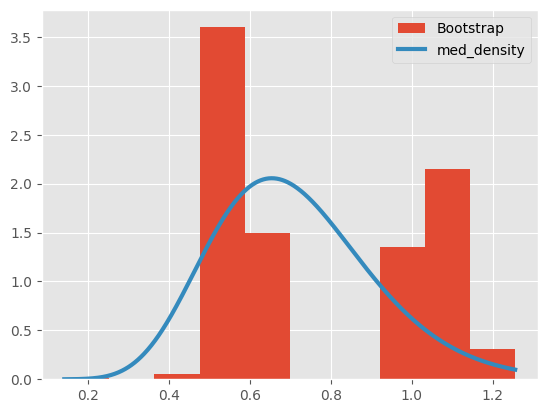

In [53]:
N_boot = 1000
boot_med = []
for i in range(N_boot):
    sub = np.random.choice(sort_arr, size = 25, replace = True)
    boot_med.append(scipy.ndimage.median(sub))
    
#Для плотности распредления медианы используем плотность распределения k-порядковой статистики(в нашем случае k=13)
def k_med_pdf(x):
    pdf = np.exp(-x)
    cdf = 1 - np.exp(-x)
    
    coef = sp.comb(25-1, 13-1)
    return 25 *coef *(cdf ** (13-1)) * ((1-cdf)**(25-13)) * pdf

x_med = np.linspace(min(boot_med), max(boot_med), 1000)
y_med = [k_med_pdf(x_i) for x_i in x_med]
    



plt.hist(boot_med, bins = int(np.log2(N_boot) + 1), density=True, label = 'Bootstrap')
plt.plot(x_med, y_med, lw = 3, label = 'med_density')
plt.legend()

